<a href="https://colab.research.google.com/github/andres-merino/OpenClass-CienciaDeDatos-PUCE/blob/main/OpenClassCienciaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: 1px solid white;border-collapse: collapse;" >
<tr>
  <td style="width:20%;vertical-align:middle;padding-right: 10;"> <img src="https://i.imgur.com/nt7hloA.png" width="100"> </td>
  <td><p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1; font-weight: bold;">Facultad de Ciencias Exactas y Naturales</p>
    <p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1; font-weight: bold;">Ciencia de Datos &bull; Open Class</p>
    <p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1;">Matemática para procesamiento de imágenes</p>
    <p style="margin: 0; text-align:left; color:#0030A1; font-style: oblique;">Andrés Merino &bull; Junio 2024</p>
  </td>  
</tr>
</table>

---
Librería para usar matrices:

In [1]:
#@title <font color="264CC7" size="+1"> Ejecutar configuración
from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

with Capturing() as output:
    print('Comenzamos....')

with Capturing(output) as output:
    # Librearías
    ! pip install ultralytics
    from ultralytics import YOLO
    model = YOLO('yolov8n.pt')

    import numpy as np

    from matplotlib import pyplot as plt

    import cv2

    from urllib.request import urlretrieve

    # Descargar la imagen
    urlretrieve("https://raw.githubusercontent.com/andres-merino/OpenClass-CienciaDeDatos-PUCE/main/Bowser.jpg", "/content/Bowser.jpg")
    urlretrieve("https://raw.githubusercontent.com/andres-merino/OpenClass-CienciaDeDatos-PUCE/main/Mario.jpg", "/content/Mario.jpg")
    urlretrieve("https://raw.githubusercontent.com/andres-merino/OpenClass-CienciaDeDatos-PUCE/main/Mario2.jpg", "/content/Mario2.jpg")
    urlretrieve("https://raw.githubusercontent.com/andres-merino/OpenClass-CienciaDeDatos-PUCE/main/OsoAurelio.jpg", "/content/OsoAurelio.jpg")

    # Descarga de códigos
    urlretrieve("https://raw.githubusercontent.com/andres-merino/OpenClass-CienciaDeDatos-PUCE/main/Codigos.txt", "/content/Codigos.txt")

    print("Cuaderno configurado")

if output[-1]=='Cuaderno configurado':
    print(output[-1])
else:
    print(output[:-2])

100%|██████████| 6.23M/6.23M [00:00<00:00, 96.0MB/s]


Cuaderno configurado


---
## <font color='264CC7'> Introducción a las matrices</font>
---

Ejemplo de escritura de una matriz:

In [2]:
A = np.array([
        [1, 2, 3],
        [4, 5, 6]
    ])

print(A)

[[1 2 3]
 [4 5 6]]


Tamaño de una matriz:

In [3]:
print(A.shape)

(2, 3)


Elementos de una matriz:

In [4]:
print(A[0,0])
print(A[1,1])

1
5


---
## <font color='264CC7'> Matrices como imágenes</font>
---

Primer ejemplo

In [5]:
img = np.array([
        [1, 0, 1, 0],
        [0, 1, 0, 1]
    ])

print(img)

[[1 0 1 0]
 [0 1 0 1]]


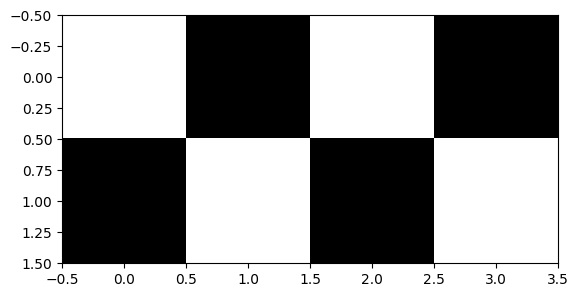

In [6]:
plt.imshow(img, cmap='gray')
plt.show()

Segundo ejemplo

In [7]:
img1 = np.array([
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 1]
    ])

print(img1)

[[1 0 1 0 1]
 [0 1 0 1 0]
 [0 1 1 1 0]
 [1 0 1 0 1]
 [1 1 0 1 1]]


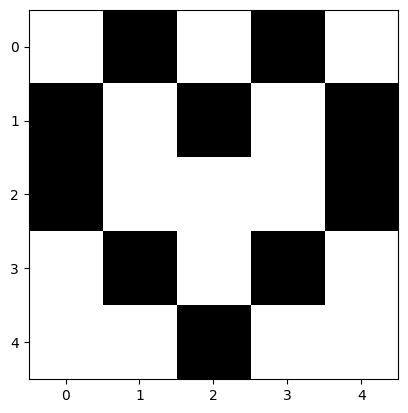

In [8]:
plt.imshow(img1, cmap='gray')
plt.show()

### Suma de imágenes

[[          1           1           1           1           1]
 [          1         0.5           1         0.5           1]
 [          1         0.5         0.5         0.5           1]
 [          1           1         0.5           1           1]
 [          1           1           1           1           1]]


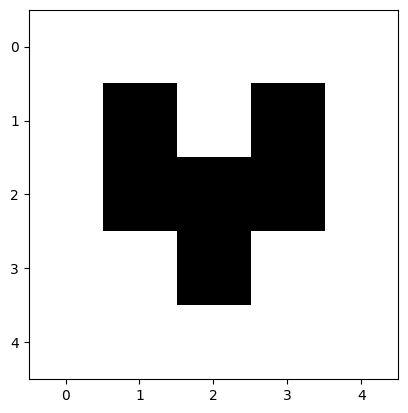

In [9]:
img2 = np.array([
        [1, 1  , 1  , 1  , 1],
        [1, 0.5, 1  , 0.5, 1],
        [1, 0.5, 0.5, 0.5, 1],
        [1, 1  , 0.5, 1  , 1],
        [1, 1  , 1  , 1  , 1]
    ])

print(img2)

plt.imshow(img2, cmap='gray')
plt.show()

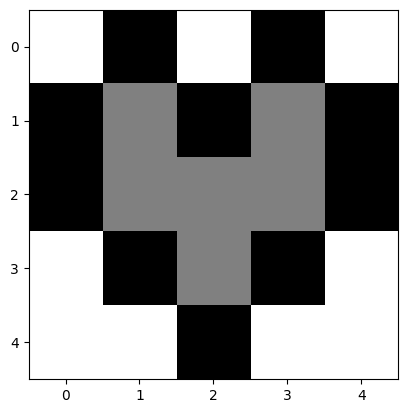

In [10]:
plt.imshow(img1+img2, cmap='gray')
plt.show()

---
## <font color='264CC7'> Imágenes a color</font>
---

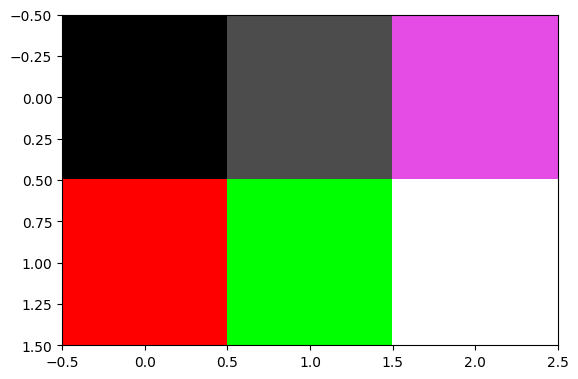

In [11]:
R = np.array([
        [0.0, 0.3, 0.9],
        [1.0, 0.0, 1.0],
    ])
G = np.array([
        [0.0, 0.3, 0.3],
        [0.0, 1.0, 1.0],
    ])
B = np.array([
        [0.0, 0.3, 0.9],
        [0.0, 0.0, 1.0],
    ])

img = np.stack([R, G, B], axis=2)

plt.imshow(img)
plt.show()

---
## <font color='264CC7'> Cargar imágenes</font>
---

(16, 12, 3)


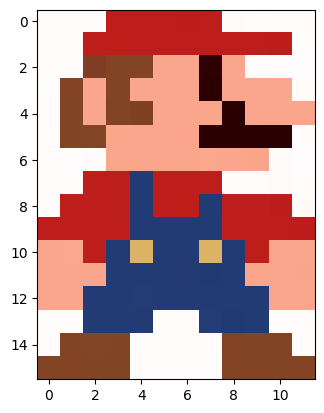

In [12]:
mario = plt.imread('Mario.jpg')
print(mario.shape)
plt.imshow(mario)
plt.show()

Algunos colores de la imagen:

In [13]:
print(mario[0,0,:])
print(mario[4,3,:])

[255 252 251]
[130  67  36]


Cambiemos el color del ojo:

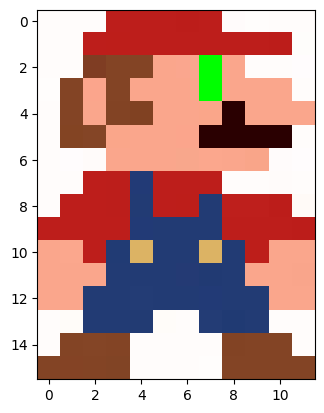

In [14]:
img = mario.copy()

img[3,7,:] = [0, 255, 0]
img[2,7,:] = [0, 255, 0]

plt.imshow(img)
plt.show()

Demos la vuelta a la imagen.

(16, 12, 3)


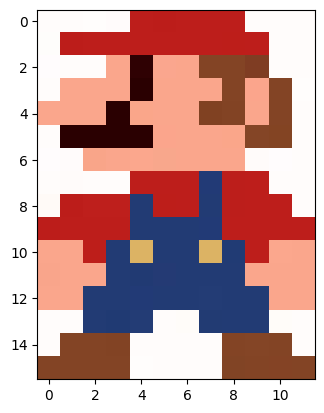

In [15]:
img = mario[:, ::-1, :]
print(img.shape)
plt.imshow(img)
plt.show()

### Reducir tamaño de una imagen

(367, 274, 3)


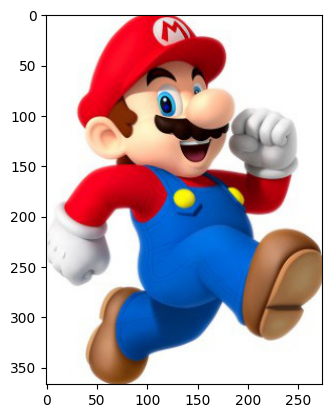

In [16]:
mario = plt.imread('Mario2.jpg')
print(mario.shape)
plt.imshow(mario)
plt.show()

Reduzco el tamaño

(367, 274, 3)


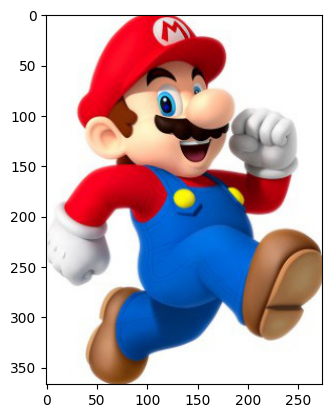

In [17]:
img = mario[::2, ::2, :]
print(img.shape)
plt.imshow(img)
plt.show()

Guardo la imagen:

In [18]:
plt.imsave('Mario3.jpg', img)

---
## <font color='264CC7'> Aplicar filtros a imágenes</font>
---

(749, 1200, 3)


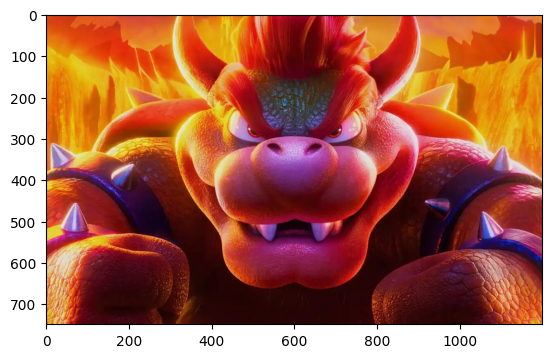

In [19]:
bowser = plt.imread('Bowser.jpg')
print(bowser.shape)
plt.imshow(bowser)
plt.show()

Filtro:

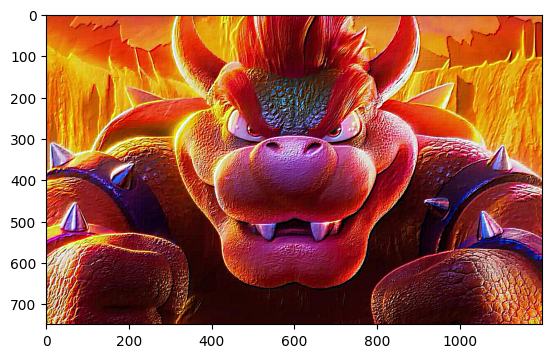

In [20]:
filtro = np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ])

img = cv2.filter2D(bowser, kernel=filtro, ddepth=-1)

plt.imshow(img)
plt.show()

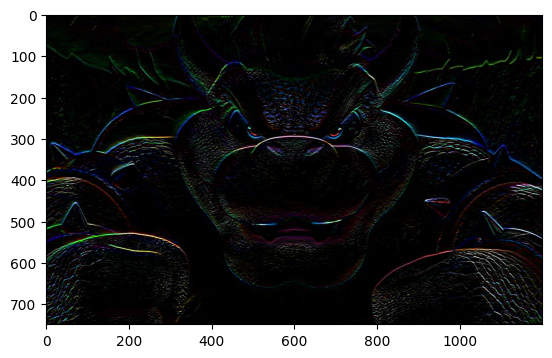

In [21]:
filtro = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])

img = cv2.filter2D(bowser, kernel=filtro, ddepth=-1)

plt.imshow(img)
plt.show()

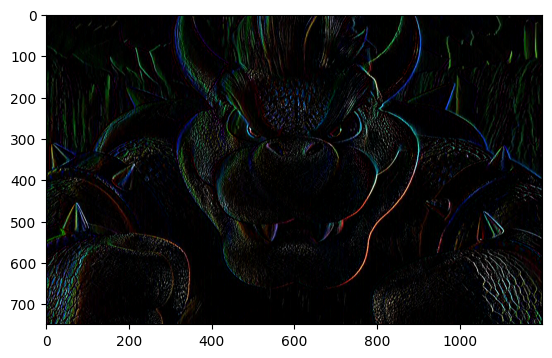

In [22]:
filtro = np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])

img = cv2.filter2D(bowser, kernel=filtro, ddepth=-1)

plt.imshow(img)
plt.show()

---
## <font color='264CC7'> Reconocimiento de patrones</font>
---

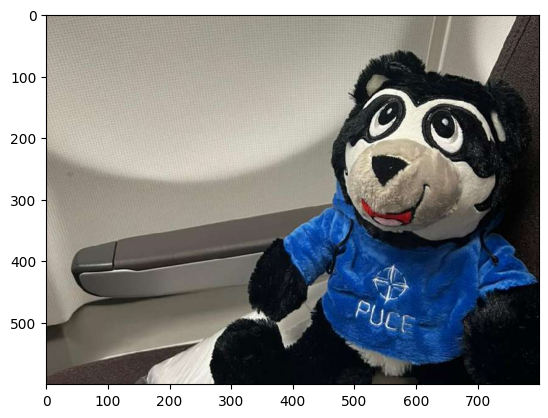

In [23]:
img = plt.imread('OsoAurelio.jpg')
plt.imshow(img)
plt.show()

In [ ]:
model = YOLO('yolov8n.pt')
results = model(img)

plt.imshow(results[0].plot())
plt.show()